https://rubialesalberto.medium.com/clustering-con-dbscan-y-hdbscan-con-python-y-sus-hiperpar%C3%A1metros-en-sklearn-8728283b96ac
https://www.youtube.com/watch?v=dGsxd67IFiU&t=2s

In [1]:
import pandas as pd
import numpy as np
import dtale
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join
from matplotlib import pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-04-21 19:56:22,653 - tensorflow - WARNING - From c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv('coursera_features.csv')
del df['Unnamed: 0']
df

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,difficulty,enrolled,institution,instructor,rating,total_hours,subcategory_Data Analysis,subcategory_Support and Operations,subcategory_Physics and Astronomy,subcategory_Software Development,...,language_Chinese (Traditional),language_Arabic,language_Ukrainian,language_Indonesian,language_Turkish,language_Korean,language_Italian,language_Hebrew,language_Hungarian,language_Swedish
0,0,-1.442038,0.022045,0.006124,1.0,120.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2.354579,0.001990,0.004133,5.0,240.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.783281,0.001990,0.004133,4.0,160.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-1.442038,0.006889,0.048990,0.0,56.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.591164,0.013778,0.048990,1.0,168.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,0,0.465567,0.004746,0.000306,6.0,19.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6528,0,-1.442038,0.180955,0.000765,4.0,1.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6529,0,0.590854,0.000612,0.048990,5.0,48.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6530,0,0.072656,0.019137,0.000153,4.0,21.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from feature_engine.imputation import ArbitraryNumberImputer

# set up the imputer
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=['rating'])

# fit the imputer
arbitrary_imputer.fit(df)

# transform the data
df= arbitrary_imputer.transform(df)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [4]:
import hdbscan
from sklearn.datasets import make_blobs

clustering_model = hdbscan.HDBSCAN(min_cluster_size=50)
cluster_labels = clustering_model.fit_predict(df)

In [71]:
cluster_labels

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([ 0, -1, -1, ...,  2,  5, -1], dtype=int64)

In [72]:
df['Labels'] = cluster_labels

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



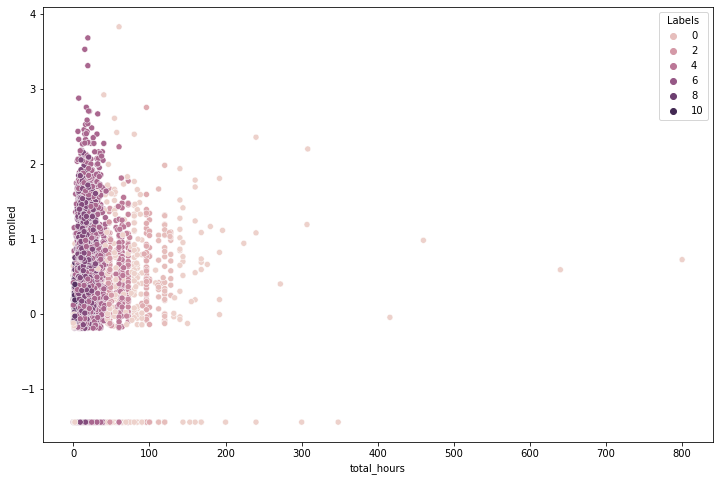

In [73]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['total_hours'], df['enrolled'], hue=df['Labels'])
plt.show()

In [74]:
clustering_model.labels_.max()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



11

In [75]:
clustering_model.probabilities_

array([1.        , 0.        , 0.        , ..., 1.        , 0.98660332,
       0.        ])

<AxesSubplot:ylabel='$\\lambda$ value'>

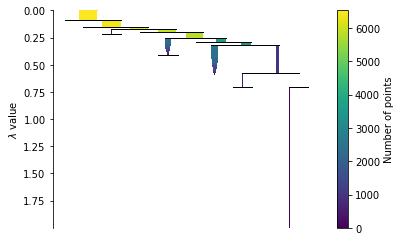

In [76]:
clustering_model.condensed_tree_.plot()

In [77]:
d = dtale.show(df, ignore_duplicate=True)
d

In [78]:
df = pd.read_csv('df_preprocessed.csv')

# Save dataframe to pickled pandas object
df['Labels'] = cluster_labels
df.to_pickle('clusters.pkl') 

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [85]:
df = pd.read_pickle('clusters.pkl')
del df['Unnamed: 0']
df

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
0,Data Science,"Obtén las , para un puesto de analista de dato...",Beginner,0.0,IBM,Taught by top companies and universities,Spanish,32.0,4.3,professional-certificates,Analista de Datos de IBM Professional Certificate,9222.0,Data Analysis,120.0,0
1,Information Technology,"In this 5-course certificate program, you’ll p...",Advanced,542057.0,Google,Google,English,1.0,4.8,professional-certificates,Google IT Support Professional Certificate,1077.0,Support and Operations,240.0,-1
2,Information Technology,"This new beginner-level, six-course certificat...",Beginner,208490.0,Google,Google,English,25148.0,4.7,professional-certificates,Google IT Automation with Python Professional ...,594388.0,Support and Operations,160.0,-1
3,Physical Science and Engineering,Эта специализация посвящена изучению правовых ...,Beginner,0.0,National Research Nuclear University MEPhI,Shareable Specialization and Course Certificates,"English, Russian",11.0,3.8,specializations,Правовые основы и базы данных в ядерной отрасл...,0.0,Physics and Astronomy,56.0,-1
4,Computer Science,"Программа состоит из четырех курсов, каждый из...",Intermediate,16289.0,Moscow Institute of Physics and Technology,Shareable Specialization and Course Certificates,Russian,1954.0,4.3,specializations,Программирование на Python Specialization,16531.0,Software Development,168.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,Arts and Humanities,唐詩不僅是詩歌史上一座巍峨的高峰，亦是人類文明的珍貴獻禮。本課程的目的並非對詩人、詩歌作一般...,Beginner,11689.0,National Taiwan University,歐麗娟,Chinese (Traditional),331.0,4.9,learn,唐詩新思路 (Tang Poetry),14441.0,Music and Art,19.0,5
6528,Computer Science,في هذه الدورة التدريبية القائمة على المشروع وا...,Beginner,0.0,Coursera,Amani Abbas,Arabic,1.0,4.7,projects,من خلال التطبيق العملي GitHub و Git تعلّم أساسيات,0.0,Software Development,1.0,-1
6529,Data Science,Maybe you are new to SQL and you want to learn...,Beginner,16276.0,Cloudera,Shareable Specialization and Course Certificates,English,1248.0,4.8,specializations,Modern Big Data Analysis with SQL Specialization,14964.0,Data Analysis,48.0,2
6530,Social Sciences,Курс ориентирован на самую широкую аудиторию с...,Beginner,3689.0,HSE University,Максимов Дмитрий Михайлович,Russian,25.0,4.7,learn,Юридическое оформление инвестиционных идей,6919.0,Law,21.0,5


In [86]:
d = dtale.show(df, ignore_duplicate=True)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.



In [101]:
mask = df["Labels"] == 11
indices_11 = df.loc[mask].index
mask = df["Labels"] == 10
indices_10 = df.loc[mask].index
mask = df["Labels"] == 9
indices_9 = df.loc[mask].index
mask = df["Labels"] == 8
indices_8 = df.loc[mask].index
mask = df["Labels"] == 7
indices_7 = df.loc[mask].index
mask = df["Labels"] == 6
indices_6 = df.loc[mask].index
mask = df["Labels"] == 5
indices_5 = df.loc[mask].index
mask = df["Labels"] == 4
indices_4 = df.loc[mask].index
mask = df["Labels"] == 3
indices_3 = df.loc[mask].index
mask = df["Labels"] == 2
indices_2 = df.loc[mask].index
mask = df["Labels"] == 1
indices_1 = df.loc[mask].index

## Label 1

In [ ]:
Cursos de informática para beginners, de unas 96 horas, especializaciones y bastante popularidad.

In [82]:
df_1 = df.iloc[indices_1]
df_1

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
6,Business,"Специализация состоит из 5 курсов, из которых ...",Beginner,4200.0,HSE University,Shareable Specialization and Course Certificates,Russian,404.0,4.7,specializations,Корпоративные финансы и стоимость компании Spe...,3334.0,Finance,96.0,1
12,Computer Science,"Пройдя эту специализацию, вы освоите основные ...",Intermediate,13679.0,Moscow Institute of Physics and Technology,Shareable Specialization and Course Certificates,Russian,1516.0,4.6,specializations,Разработка интерфейсов: вёрстка и JavaScript S...,10837.0,Software Development,96.0,1
23,Data Science,Специализация “Просто о статистике” познакомит...,Beginner,0.0,Saint Petersburg State University,Shareable Specialization and Course Certificates,Russian,76.0,4.7,specializations,Просто о статистике (с использованием R) Speci...,2425.0,Probability and Statistics,96.0,1
59,Business,"In this Specialization, Professional IQ: Prev...",Beginner,2178.0,University of Illinois at Urbana-Champaign,C. K. Gunsalus,English,115.0,4.8,specializations,Professional IQ: Preventing and Solving Proble...,1613.0,Business Essentials,96.0,1
95,Data Science,uses algorithms to understand and manipulate ...,Intermediate,51412.0,DeepLearning.AI,Shareable Specialization and Course Certificates,English,4307.0,4.6,specializations,Natural Language Processing Specialization,97400.0,Machine Learning,96.0,1
133,Data Science,"What is machine learning, and what kinds of pr...",Intermediate,75071.0,Google Cloud,Google Cloud Training,English,15903.0,4.5,specializations,Machine Learning with TensorFlow on Google Clo...,21800.0,Machine Learning,100.0,1
240,Arts and Humanities,This Specialization covers a broad range of fu...,Beginner,86378.0,Michigan State University,Shareable Specialization and Course Certificates,English,7961.0,4.8,specializations,Photography Basics and Beyond: From Smartphone...,55500.0,Music and Art,96.0,1
273,Language Learning,This specialization is the second of two speci...,Beginner,22839.0,Arizona State University,Shareable Specialization and Course Certificates,English,4704.0,4.9,specializations,"TESOL Certificate, Part 2: Teach English Now! ...",8972.0,Learning English,96.0,1
279,Computer Science,This specialization is intended for software e...,Beginner,4505.0,University of Colorado System,Kristen Walcott-Justice,English,663.0,4.6,specializations,Requirements Engineering: Secure Software Spe...,2135.0,Software Development,96.0,1
293,Language Learning,This specialization is the first of two specia...,Beginner,59243.0,Arizona State University,Shareable Specialization and Course Certificates,English,19167.0,4.9,specializations,"TESOL Certificate, Part 1: Teach English Now! ...",46907.0,Learning English,96.0,1


In [83]:
d = dtale.show(df_1)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 2

Subcategoría datos y negocio, 48 horas de duración, pocas visitas, IBM, especializaciones.

In [87]:
df_2 = df.iloc[indices_2]

df_2

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
24,Business,The Startup Valuation and Financial Analysis S...,Beginner,6918.0,Yonsei University,Shareable Specialization and Course Certificates,English,509.0,4.4,specializations,Valuation and Financial Analysis For Startups ...,3583.0,Finance,48.0,2
44,Health,"Why are some groups healthier than others, and...",Beginner,0.0,University of Michigan,Shareable Specialization and Course Certificates,English,1.0,4.7,specializations,The Influence of Social Determinants on Health...,10873.0,Public Health,48.0,2
46,Health,"Of all the animals on earth, which are the str...",Beginner,28396.0,University of Alberta,Dr. Maya Evenden,English,866.0,4.9,learn,Bugs 101: Insect-Human Interactions,83445.0,Basic Science,49.0,2
47,Business,This Specialization is intended for working pr...,Beginner,0.0,"University of California, Davis",Shareable Specialization and Course Certificates,English,35.0,4.9,specializations,Professional Skills for the Workplace Speciali...,8071.0,Business Essentials,48.0,2
58,Information Technology,This specialization gives participants broad s...,Intermediate,30678.0,Google Cloud,Google Cloud Training,English,39775.0,4.8,specializations,Networking in Google Cloud Specialization,8554.0,Networking,48.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,Data Science,This capstone project course will give you a t...,Intermediate,70771.0,IBM,Alex Aklson,English,5144.0,4.7,learn,Applied Data Science Capstone,320128.0,Data Analysis,47.0,2
6088,Computer Science,"Beyond practices and beyond principles, you'll...",Beginner,23675.0,University of Virginia,Alex Cowan,English,1.0,4.7,specializations,Agile Development Specialization,32747.0,Design and Product,48.0,2
6204,Computer Science,This course is for anyone passionate in learni...,Beginner,10011.0,Politecnico di Milano,Marco Domenico Santambrogio,English,163.0,4.6,learn,FPGA computing systems: Background knowledge ...,12666.0,Design and Product,46.0,2
6498,Physical Science and Engineering,"Les structures en treillis, en poutre, en dall...",Intermediate,4407.0,École Polytechnique Fédérale de Lausanne,Olivier L. Burdet,French,14.0,4.6,learn,"L'Art des Structures 2 : treillis, poutres, da...",5548.0,Mechanical Engineering,47.0,2


In [88]:
d = dtale.show(df_2)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 3

Especializaciones de negocio de 71 horas, IE Business School

In [89]:
df_3 = df.iloc[indices_3]

df_3

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
7,Computer Science,Integrate UX Research and UX Design to create ...,Beginner,25412.0,University of Michigan,Shareable Specialization and Course Certificates,English,1839.0,4.7,specializations,User Experience Research and Design Specializa...,52282.0,Design and Product,72.0,3
33,Computer Science,In this Software Product Management Specializ...,Beginner,50644.0,University of Alberta,Kenny Wong,English,17710.0,4.7,specializations,Software Product Management Specialization,43579.0,Design and Product,72.0,3
41,Health,A newborn baby is an amazing beautiful life fi...,Beginner,7222.0,University of Colorado System,Shareable Specialization and Course Certificates,English,1.0,4.8,specializations,Newborn Baby Care Specialization,8322.0,Patient Care,72.0,3
79,Business,"The , specialization focuses on issues of Inno...",Beginner,18613.0,Technion - Israel Institute of Technology,Shareable Specialization and Course Certificates,English,2112.0,4.8,specializations,Startup Entrepreneurship Specialization,6092.0,Entrepreneurship,72.0,3
89,Social Sciences,"Social and emotional learning, or SEL, program...",Beginner,6951.0,University of Colorado Boulder,Shareable Specialization and Course Certificates,English,828.0,4.8,specializations,The Teacher and Social and Emotional Learning ...,7703.0,Education,72.0,3
90,Data Science,¿Qué es el aprendizaje automático? ¿Qué tipos ...,Intermediate,2525.0,Google Cloud,Google Cloud Training,Spanish,433.0,4.6,specializations,Machine Learning with TensorFlow on Google Clo...,3575.0,Machine Learning,72.0,3
116,Data Science,O que é aprendizado de máquina e que tipos de ...,Intermediate,0.0,Google Cloud,Google Cloud Training,Portuguese (Brazilian),149.0,4.6,specializations,Machine Learning with TensorFlow on Google Clo...,0.0,Machine Learning,72.0,3
119,Business,"Sales jobs span nearly every industry, from ag...",Beginner,7007.0,West Virginia University,Shareable Specialization and Course Certificates,English,314.0,4.6,specializations,Sales Operations/Management Specialization,4968.0,Leadership and Management,72.0,3
183,Information Technology,The Google Cloud Professional Cloud Architect ...,Intermediate,10779.0,Google Cloud,Google Cloud Training,English,1.0,4.7,professional-certificates,Cloud Architecture with Google Cloud Professio...,71174.0,Cloud Computing,72.0,3
257,Social Sciences,"In the U.S., social policy accounts for two-th...",Beginner,2051.0,Columbia University,John Robertson,English,331.0,4.8,specializations,Social Policy for Social Services & Health Pra...,3314.0,Governance and Society,72.0,3


In [90]:
d = dtale.show(df_3)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 4

Desarrollo software, Cloud Computing, Coursera, Google Cloud, Nestor Nicolás, menos popularidad.

In [92]:
df_4 = df.iloc[indices_4]
df_4

,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
21,Arts and Humanities,A indústria da música está passando por uma en...,Beginner,0.0,Berklee College of Music,Shareable Specialization and Course Certificates,"Portuguese (Brazilian), English",84.0,4.9,specializations,O Músico Contemporâneo Specialization,0.0,Music and Art,60.0,4
73,Business,This specialization is intended for managers -...,Beginner,25072.0,ESSEC Business School,Shareable Specialization and Course Certificates,English,1539.0,4.7,specializations,"Negotiation, Mediation and Conflict Resolution...",18912.0,Leadership and Management,60.0,4
78,Business,The Salesforce Fundamentals specialization gui...,Beginner,0.0,"University of California, Irvine",Stephane Muller,English,20.0,4.4,specializations,Salesforce Fundamentals Specialization,7987.0,Business Essentials,60.0,4
117,Arts and Humanities,This Specialization will give you the knowledg...,Beginner,30396.0,Berklee College of Music,Shareable Specialization and Course Certificates,English,3030.0,4.8,specializations,Music Production Specialization,39104.0,Music and Art,60.0,4
130,Computer Science,In this Test-Driven Development Specialization...,Intermediate,0.0,LearnQuest,Doug Purcell,English,12.0,4.9,specializations,Test-Driven Development Specialization,1580.0,Software Development,60.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,Computer Science,This course covers the essential information t...,Intermediate,218923.0,Princeton University,Robert Sedgewick,English,1547.0,4.9,learn,"Algorithms, Part II",105070.0,Algorithms,63.0,4
6138,Data Science,This 5-course specialization focuses on advanc...,Advanced,33610.0,Google Cloud,Google Cloud Training,English,3632.0,4.5,specializations,Advanced Machine Learning with TensorFlow on G...,12726.0,Machine Learning,60.0,4
6176,Information Technology,"En este proyecto de 1 hora, aprenderás a imple...",Intermediate,0.0,Coursera,Nestor Nicolas Campos Rojas,Spanish,1.0,4.7,projects,Aprendiendo Infraestructura como código con Te...,0.0,Cloud Computing,60.0,4
6245,Data Science,"En este proyecto de 1 hora, aprenderás a desar...",Beginner,0.0,Coursera,Nestor Nicolas Campos Rojas,Spanish,6.0,4.7,projects,Analizando sentimientos y entidades en textos ...,0.0,Machine Learning,60.0,4


In [93]:
d = dtale.show(df_4)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 5

Cortos, cursos

In [94]:
df_5 = df.iloc[indices_5]
df_5

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
15,Business,À travers son fil pédagogique riche d’intervie...,Beginner,2470.0,Sciences Po,Sana De Courcelles,French,16.0,4.1,learn,Be entrepreneurial in Cultural Industries in t...,2292.0,Entrepreneurship,10.0,5
20,Business,Специализация «Мировая экономика» направлена н...,Beginner,0.0,Moscow State Institute of International Relati...,Shareable Specialization and Course Certificates,Russian,53.0,4.8,specializations,Мировая экономика Specialization,0.0,Business Strategy,32.0,5
29,Information Technology,"In this specialization, you will learn the Api...",Beginner,0.0,Google Cloud,Google Cloud Training,English,16.0,4.7,specializations,Managing Google Cloud's Apigee API Platform fo...,1719.0,Cloud Computing,16.0,5
37,Information Technology,This specialization offers the latest developm...,Beginner,0.0,Association of International Certified Profess...,This Course Plus the Full Specialization,English,23.0,4.6,learn,Blockchain Opportunities Beyond Crypto Assets,3002.0,Security,3.0,5
39,Business,The present course gives an overview of Bases ...,Beginner,0.0,Moscow State Institute of International Relati...,Шашкова Анна Владиславовна,English,6.0,5.0,learn,Bankruptcy Law,1618.0,Business Strategy,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6520,Physical Science and Engineering,En este curso aprenderemos los fundamentos del...,Beginner,30664.0,Universitat Autònoma de Barcelona,Jean-Pierre Deschamps,Spanish,223.0,4.8,learn,Sistemas Digitales: De las puertas lógicas al ...,33656.0,Electrical Engineering,42.0,5
6525,Arts and Humanities,目前市面上有越来越多的微电影技术与流程方面的教程，通过它们你可以知道拍微电影大致的制作流程与...,Beginner,9246.0,Fudan University,许 肖潇,Chinese (Simplified),46.0,4.7,learn,微影人的自我修养,0.0,Music and Art,14.0,5
6526,Information Technology,This specialization is a four-course sequence ...,Beginner,0.0,Georgia Institute of Technology,Shareable Specialization and Course Certificates,English,32.0,4.8,specializations,System Issues in Cloud Computing Specialization,1806.0,Cloud Computing,24.0,5
6527,Arts and Humanities,唐詩不僅是詩歌史上一座巍峨的高峰，亦是人類文明的珍貴獻禮。本課程的目的並非對詩人、詩歌作一般...,Beginner,11689.0,National Taiwan University,歐麗娟,Chinese (Traditional),331.0,4.9,learn,唐詩新思路 (Tang Poetry),14441.0,Music and Art,19.0,5


In [95]:
d = dtale.show(df_5)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 6

Coursera, intermedio, móviles, Judy

In [96]:
df_6 = df.iloc[indices_6]
df_6

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
42,Computer Science,This 2 hour-long guided project is part 2 of t...,Intermediate,1738.0,Coursera,Harrison Kong,English,16.0,4.7,projects,Build A Google Firebase Web App (Part II),0.0,Mobile and Web Development,2.0,6
43,Data Science,"In this 1-hour long project-based course, you ...",Beginner,0.0,Coursera,Mohamed Jendoubi,English,1.0,4.7,projects,Build a Classification Model using PyCaret,0.0,Machine Learning,2.0,6
96,Data Science,"In this 2-hour long project-based course, you ...",Beginner,0.0,Coursera,Mohammed Murtuza Qureshi,English,1.0,4.7,projects,Building Your First Chatbot Using Rasa Framewo...,0.0,Machine Learning,2.0,6
181,Computer Science,"In this short project-based course, you will l...",Intermediate,0.0,Coursera,Alex Ziskind,English,1.0,4.7,projects,Blazor and JavaScript Interoperability,0.0,Mobile and Web Development,1.0,6
237,Computer Science,This project will teach you easy and simple ex...,Intermediate,0.0,Coursera,Chaitra Deshpande,English,1.0,4.7,projects,CSS3 Flexbox - Mastering the Basics,0.0,Mobile and Web Development,1.5,6
324,Computer Science,"By the end of this project, you will be able t...",Intermediate,0.0,Coursera,Judy Richardson,English,1.0,4.7,projects,Basic User Interface Design for Web Developers,0.0,Mobile and Web Development,2.0,6
373,Computer Science,This project will teach you how to implement a...,Intermediate,0.0,Coursera,Chaitra Deshpande,English,1.0,4.7,projects,Build Responsive Service Page UI using CSS3 Fl...,0.0,Mobile and Web Development,1.5,6
399,Computer Science,This project will teach you how to implement a...,Intermediate,0.0,Coursera,Chaitra Deshpande,English,1.0,4.7,projects,Build Responsive Image Gallery UI using CSS3 F...,0.0,Mobile and Web Development,1.5,6
405,Data Science,Self Driving cars have caught the attention of...,Beginner,0.0,Coursera,Ranjan Relan,English,1.0,4.7,projects,Build your first Self Driving Car using AWS De...,0.0,Machine Learning,2.0,6
421,Computer Science,This project will teach you how to implement a...,Intermediate,0.0,Coursera,Chaitra Deshpande,English,1.0,4.7,projects,Build Responsive CSS3 Flexbox Holy Grail Layout,0.0,Mobile and Web Development,1.5,6


In [97]:
d = dtale.show(df_6)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 7

Cursos muy cortos.

In [98]:
df_7 = df.iloc[indices_7]
df_7

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
14,Data Science,Gran parte de los datos del mundo residen en b...,Beginner,0.0,IBM,Rav Ahuja,Spanish,1.0,4.7,learn,Bases de datos y SQL para ciencia de datos,5739.0,Data Analysis,14.0,7
17,Computer Science,This fourth course of the Blockchain specializ...,Intermediate,18076.0,University at Buffalo,Bina Ramamurthy,English,781.0,4.6,learn,Blockchain Platforms,19133.0,Software Development,16.0,7
26,Business,The objectives of this MOOC are to enable you ...,Beginner,4024.0,Case Western Reserve University,This Course Plus the Full Specialization,English,36.0,4.7,learn,"Be a Leader, Develop a Leader",5187.0,Leadership and Management,6.0,7
27,Data Science,This course gives you context and first-hand e...,Beginner,16314.0,"University of California, Davis",Martin Hilbert,English,290.0,4.6,learn,"Big Data, Artificial Intelligence, and Ethics",26690.0,Data Analysis,12.0,7
28,Business,In this fourth and final course of the special...,Intermediate,12953.0,INSEAD,This Course Plus the Full Specialization,English,130.0,4.5,learn,Blockchain Opportunity Analysis,20674.0,Business Strategy,13.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,Math and Logic,Calculus is one of the grandest achievements o...,Beginner,28133.0,University of Pennsylvania,Robert Ghrist,English,220.0,4.7,learn,Single Variable Calculus,22196.0,Math and Logic,14.0,7
6521,Physical Science and Engineering,This course supplies learners with the insight...,Intermediate,7825.0,University at Buffalo,Gay E Canough,English,326.0,4.7,learn,Solar Energy and Electrical System Design,40691.0,Environmental Science and Sustainability,17.0,7
6522,Social Sciences,People are social creatures and the modern Int...,Beginner,24267.0,University of California San Diego,Scott Klemmer,English,798.0,4.4,learn,Social Computing,7152.0,Governance and Society,9.0,7
6523,Information Technology,This self-paced training course gives particip...,Intermediate,7626.0,Google Cloud,Google Cloud Training,English,194.0,4.6,learn,Security Best Practices in Google Cloud,34677.0,Cloud Computing,11.0,7


In [99]:
d = dtale.show(df_7)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 8

Proyectos

In [102]:
df_8 = df.iloc[indices_8]
df_8

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
31,Computer Science,"By the end of this project, you will build a c...",Beginner,0.0,Coursera,Jonathan Owen,English,1.0,4.7,projects,Build a Custom Profile Avatar with Inkscape,0.0,Design and Product,2.0,8
32,Business,Creating compliant material is the right thing...,Intermediate,0.0,Coursera,Tricia Bagley,English,1.0,4.7,projects,Build Accessible and 508 Compliant Surveys in ...,0.0,Business Essentials,2.0,8
49,Data Science,In this 1 hour class you will learn the basics...,Intermediate,0.0,Coursera,Harrison Kong,English,1.0,4.7,projects,Big Data with Scala and Spark,0.0,Data Analysis,1.5,8
61,Data Science,"In this hands-on project, we will build and tr...",Beginner,0.0,Coursera,Ryan Ahmed,English,1.0,4.7,projects,Bank Loan Approval Prediction With Artificial ...,0.0,Data Analysis,2.0,8
82,Information Technology,"By the end of this project, you will create a ...",Beginner,0.0,Coursera,Hussam El Aassar,English,1.0,4.7,projects,Build a Small Simulated Network With Cisco Pac...,0.0,Networking,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,Computer Science,"In this one hour long project-based course, yo...",Intermediate,2233.0,Coursera,Daniel Romaniuk,English,46.0,4.7,projects,Analyzing Video with OpenCV and NumPy,0.0,Software Development,1.0,8
6458,Computer Science,"In this 1-hour long project-based course, you ...",Intermediate,2635.0,Coursera,Anirudh Balasubramanian,English,89.0,4.7,projects,Applying Data Structures to Manipulate Cleanse...,0.0,Software Development,2.0,8
6485,Computer Science,"By the end of this project, you will be able t...",Intermediate,0.0,Coursera,Tricia Bagley,English,1.0,4.7,projects,Design a Remote Sprint to Test Prototypes in Miro,0.0,Design and Product,2.0,8
6486,Computer Science,"By the end of this project, you will be able t...",Beginner,0.0,Coursera,Tricia Bagley,English,1.0,4.7,projects,Design a User Interface (UI) Story Map in Miro,0.0,Design and Product,2.0,8


In [103]:
d = dtale.show(df_8)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.



## Label 9

Proyectos de data science de tíos parecidos.

In [104]:
df_9 = df.iloc[indices_9]
df_9

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
142,Data Science,"In this 2-hour long project-based course, you ...",Intermediate,0.0,Coursera,Charles Ivan Niswander II,English,1.0,4.7,projects,Build a Recommender System in Python,0.0,Machine Learning,2.0,9
144,Data Science,In this guided project you will get familiar w...,Intermediate,0.0,Coursera,Farhad Abdi,English,8.0,4.7,projects,Bayesian Optimization with Python,0.0,Machine Learning,2.0,9
323,Data Science,"In this 2-hour long project-based course, you ...",Intermediate,4207.0,Coursera,Amit Yadav,English,71.0,4.7,projects,Avoid Overfitting Using Regularization in Tens...,0.0,Machine Learning,2.0,9
400,Data Science,Welcome to this hands-on project on building y...,Intermediate,9369.0,Coursera,Snehan Kekre,English,332.0,4.7,projects,Build a Machine Learning Web App with Streamli...,0.0,Machine Learning,1.5,9
452,Data Science,Welcome to this project-based course on Basic ...,Intermediate,6820.0,Coursera,Amit Yadav,English,192.0,4.7,projects,Basic Sentiment Analysis with TensorFlow,0.0,Machine Learning,2.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168,Data Science,It has been said that obtaining and cleaning d...,Intermediate,0.0,Coursera,Charles Ivan Niswander II,English,14.0,4.7,projects,"Cleaning, Reshaping, and Expanding Datasets in...",0.0,Machine Learning,2.0,9
6195,Data Science,"This is a hands-on, guided project on Predicti...",Intermediate,2611.0,Coursera,Snehan Kekre,English,45.0,4.7,projects,Predictive Analytics for Business with H2O in R,0.0,Machine Learning,1.5,9
6237,Data Science,"In this 1-hour long project-based course, you ...",Intermediate,6361.0,Coursera,Snehan Kekre,English,233.0,4.7,projects,Classify Radio Signals from Space using Keras,0.0,Machine Learning,1.5,9
6252,Data Science,"In this 1.5 hour long project-based course, yo...",Intermediate,5237.0,Coursera,Amit Yadav,English,145.0,4.7,projects,Classification with Transfer Learning in Keras,0.0,Machine Learning,2.0,9


In [105]:
d = dtale.show(df_9)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu

## Label 10

Proyectos de software development de tíos parecidos.

In [106]:
df_10 = df.iloc[indices_10]
df_10

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
244,Computer Science,"In this 1-hour long project-based course, you ...",Intermediate,0.0,Coursera,Amit Navgire,English,1.0,4.7,projects,Azure Synapse SQL Pool - Implement Polybase,0.0,Software Development,2.0,10
498,Computer Science,In this project you will create a guessing gam...,Intermediate,0.0,Coursera,David Dalsveen,English,6.0,4.7,projects,Build a Guessing Game Application using C++,0.0,Software Development,2.0,10
522,Computer Science,"In this 2-hour long project-based course, you ...",Intermediate,0.0,Coursera,Piroz Amin,English,1.0,4.7,projects,Build Messenger Clone Using PHP and MySQL,0.0,Software Development,2.0,10
612,Computer Science,In this project you will create a C++ applicat...,Intermediate,0.0,Coursera,David Dalsveen,English,1.0,4.7,projects,"C++ Inheritance, Aggregation and Composition",0.0,Software Development,2.0,10
671,Computer Science,In this project you will create an application...,Intermediate,0.0,Coursera,David Dalsveen,English,6.0,4.7,projects,C++ Decision Programming,0.0,Software Development,2.0,10
688,Computer Science,In this project you will read weather data fro...,Intermediate,0.0,Coursera,David Dalsveen,English,1.0,4.7,projects,C++ Data Structures in the STL,0.0,Software Development,2.0,10
703,Computer Science,In this project you will create an application...,Intermediate,0.0,Coursera,David Dalsveen,English,9.0,4.7,projects,C++ Classes and Objects,0.0,Software Development,2.0,10
715,Computer Science,In this project you will read weather data fro...,Intermediate,0.0,Coursera,David Dalsveen,English,12.0,4.7,projects,C++ Arrays and Loops,0.0,Software Development,2.0,10
722,Computer Science,"By the end of this project, you will create a ...",Intermediate,0.0,Coursera,Marwan Abdel Rady,English,1.0,4.7,projects,Build a Word Jumble using Java Basics,0.0,Software Development,2.0,10
1533,Computer Science,"By the end of this project, you will use pytho...",Intermediate,0.0,Coursera,David Dalsveen,English,1.0,4.7,projects,Use Python to Create a Web Testing Bot,0.0,Software Development,2.0,10


In [107]:
d = dtale.show(df_10)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.



## Label 11

In [ ]:
Más proyectos de software development.

In [108]:
df_11 = df.iloc[indices_11]
df_11

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,category,description,difficulty,enrolled,institution,instructor,language,n_ratings,rating,section,title,views,subcategory,total_hours,Labels
77,Computer Science,"In this one-hour, project-based course, you'll...",Beginner,0.0,Coursera,Edward Falzon,English,1.0,4.7,projects,Baking Lights for Better Performance in Unity,0.0,Software Development,1.5,11
310,Computer Science,"By the end of this project, you will create a ...",Beginner,0.0,Coursera,Marwan Abdel Rady,English,1.0,4.7,projects,Build Sports Management System using JavaFX,0.0,Software Development,2.0,11
457,Computer Science,By the end of of this project you will create ...,Beginner,0.0,Coursera,David Dalsveen,English,1.0,4.7,projects,Build a Guessing Game in C# on Linux,0.0,Software Development,2.0,11
538,Computer Science,Behavior Driven Development encourages collabo...,Beginner,0.0,Coursera,Saurabh Dhingra,English,28.0,4.7,projects,Behavior Driven Development with Selenium and ...,0.0,Software Development,2.0,11
672,Computer Science,In this Guided Project you will create a simpl...,Beginner,0.0,Coursera,Mario Ferraro,English,7.0,4.7,projects,Build a simple company expense tracker with Ty...,0.0,Software Development,2.0,11
718,Computer Science,"In this 2-hour long project-based course, you ...",Beginner,0.0,Coursera,Piroz Amin,English,1.0,4.7,projects,C# Fundamentals In Practice,0.0,Software Development,2.0,11
723,Computer Science,"In this 1-hour long project-based course, you ...",Beginner,0.0,Coursera,Ahmed Hany,English,1.0,4.7,projects,Chicken Invaders Game in Python using Pygame,0.0,Software Development,1.5,11
1684,Computer Science,One of the biggest challenges QAs and Develope...,Beginner,0.0,Coursera,Saurabh Dhingra,English,1.0,4.7,projects,Waits in Selenium Test Automation Tool,0.0,Software Development,2.0,11
2148,Computer Science,“Selenium automates browser” That’s it! What y...,Beginner,0.0,Coursera,Saurabh Dhingra,English,12.0,4.7,projects,Selenium Grid - Running Selenium tests in para...,0.0,Software Development,2.0,11
2270,Computer Science,Every development team or automation team need...,Beginner,0.0,Coursera,Saurabh Dhingra,English,11.0,4.7,projects,Source control management for test automation ...,0.0,Software Development,2.0,11


In [109]:
d = dtale.show(df_11)
d

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\dtale\views.py:1673: Futu